<a href="https://colab.research.google.com/github/codeOblind/API/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)


In [ ]:
data=pd.read_csv("/content/house.csv")

In [ ]:
with open("/content/house.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [ ]:
data.shape

(25089, 19)

In [ ]:
data=pd.read_csv("/content/house.csv",encoding="ascii")

In [ ]:
data.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25089 entries, 0 to 25088
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           25089 non-null  object 
 1   SUBURB            25089 non-null  object 
 2   PRICE             25089 non-null  int64  
 3   BEDROOMS          25089 non-null  int64  
 4   BATHROOMS         25089 non-null  int64  
 5   GARAGE            23280 non-null  float64
 6   LAND_AREA         25089 non-null  int64  
 7   FLOOR_AREA        25089 non-null  int64  
 8   BUILD_YEAR        22806 non-null  float64
 9   CBD_DIST          25089 non-null  int64  
 10  NEAREST_STN       25089 non-null  object 
 11  NEAREST_STN_DIST  25089 non-null  int64  
 12  DATE_SOLD         25089 non-null  object 
 13  POSTCODE          25089 non-null  int64  
 14  LATITUDE          25089 non-null  float64
 15  LONGITUDE         25089 non-null  float64
 16  NEAREST_SCH       25089 non-null  object

In [ ]:
data.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE              1809
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          2283
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       1
NEAREST_SCH_RANK    8096
dtype: int64

<Axes: >

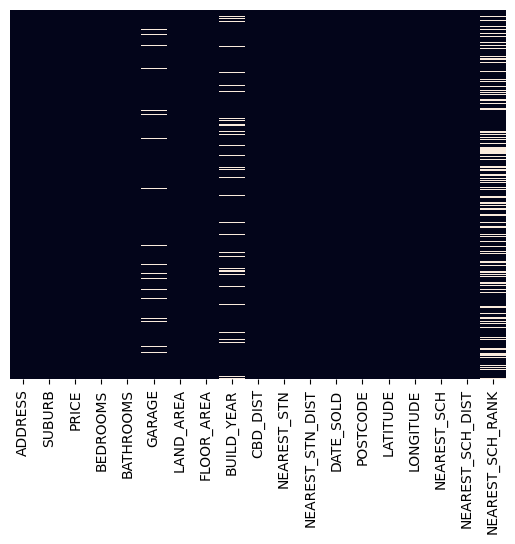

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.columns = data.columns.str.lower()

data.columns

Index(['address', 'suburb', 'price', 'bedrooms', 'bathrooms', 'garage',
       'land_area', 'floor_area', 'build_year', 'cbd_dist', 'nearest_stn',
       'nearest_stn_dist', 'date_sold', 'postcode', 'latitude', 'longitude',
       'nearest_sch', 'nearest_sch_dist', 'nearest_sch_rank'],
      dtype='object')

In [ ]:
schrank_null = data["nearest_sch_rank"].isnull().sum()
print(f"Number of null values for nearest_sch_rank: {schrank_null}")

data = data.drop(columns=["nearest_sch_rank", "postcode"])

Number of null values for nearest_sch_rank: 8096


In [ ]:
data.shape

(25089, 17)

In [ ]:
data.isnull().sum()

address                0
suburb                 0
price                  0
bedrooms               0
bathrooms              0
garage              1809
land_area              0
floor_area             0
build_year          2283
cbd_dist               0
nearest_stn            0
nearest_stn_dist       0
date_sold              0
latitude               0
longitude              0
nearest_sch            0
nearest_sch_dist       1
dtype: int64

In [ ]:
garage_null = data["garage"].isnull().sum()
print(f"Number of null values for garage: {garage_null}")

garage_mean = data["garage"].mean().round(1)
print(f"Avg number of garages: {garage_mean}")

data["garage"] = data["garage"].fillna(garage_mean)

Number of null values for garage: 1809
Avg number of garages: 2.2


In [ ]:
year_null = data["build_year"].isnull().sum()
print(f"Number of null values for build year: {year_null}")

year_mean = data["build_year"].mean().round(0)
print(f"Avg Build Year: {year_mean}")

data["build_year"] = data["build_year"].fillna(year_mean)

Number of null values for build year: 2283
Avg Build Year: 1990.0


In [ ]:
data.isnull().sum()

address             0
suburb              0
price               0
bedrooms            0
bathrooms           0
garage              0
land_area           0
floor_area          0
build_year          0
cbd_dist            0
nearest_stn         0
nearest_stn_dist    0
date_sold           0
latitude            0
longitude           0
nearest_sch         0
nearest_sch_dist    1
dtype: int64

In [ ]:
data = data.drop(columns=["facility_dist"])

In [ ]:
data.isnull().sum()

price                       0
bedrooms                    0
bathrooms                   0
garage                      0
land_area                   0
floor_area                  0
build_year                  0
cbd_dist                    0
nearest_stn_dist            0
latitude                    0
longitude                   0
year_sold                   0
month_sold                  0
main_rooms                  0
floor_area_per_bedroom      0
floor_area_per_bathroom     0
floor_area_per_room         0
floor_area_per_land_area    0
time_to_sell                0
dtype: int64

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = data.select_dtypes(include=numerics)

num_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'garage', 'land_area', 'floor_area',
       'build_year', 'cbd_dist', 'nearest_stn_dist', 'latitude', 'longitude',
       'nearest_sch_dist'],
      dtype='object')

In [ ]:
num_data.describe()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,nearest_sch_dist
count,2.508900e+04,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25089.000000,25088.000000
mean,6.353571e+05,3.656822,1.822113,2.195416,2598.573997,183.295867,1989.776795,19742.104827,4513.675196,-31.960623,115.878947,1.807799
std,3.550420e+05,0.751360,0.582041,1.298444,16156.267353,71.857252,19.891465,11353.612295,4459.548093,0.177573,0.117874,1.727230
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,-32.467416,115.583610,0.070912
25%,4.100000e+05,3.000000,1.000000,2.000000,502.000000,130.000000,1980.000000,11200.000000,1800.000000,-32.067999,115.789720,0.883363
50%,5.350000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1993.000000,17400.000000,3200.000000,-31.932950,115.853840,1.346423
75%,7.600000e+05,4.000000,2.000000,2.000000,834.000000,222.000000,2004.000000,26500.000000,5300.000000,-31.844643,115.970098,2.091367
max,2.440000e+06,10.000000,7.000000,99.000000,999999.000000,870.000000,2017.000000,59400.000000,34900.000000,-31.462553,116.317640,23.254372


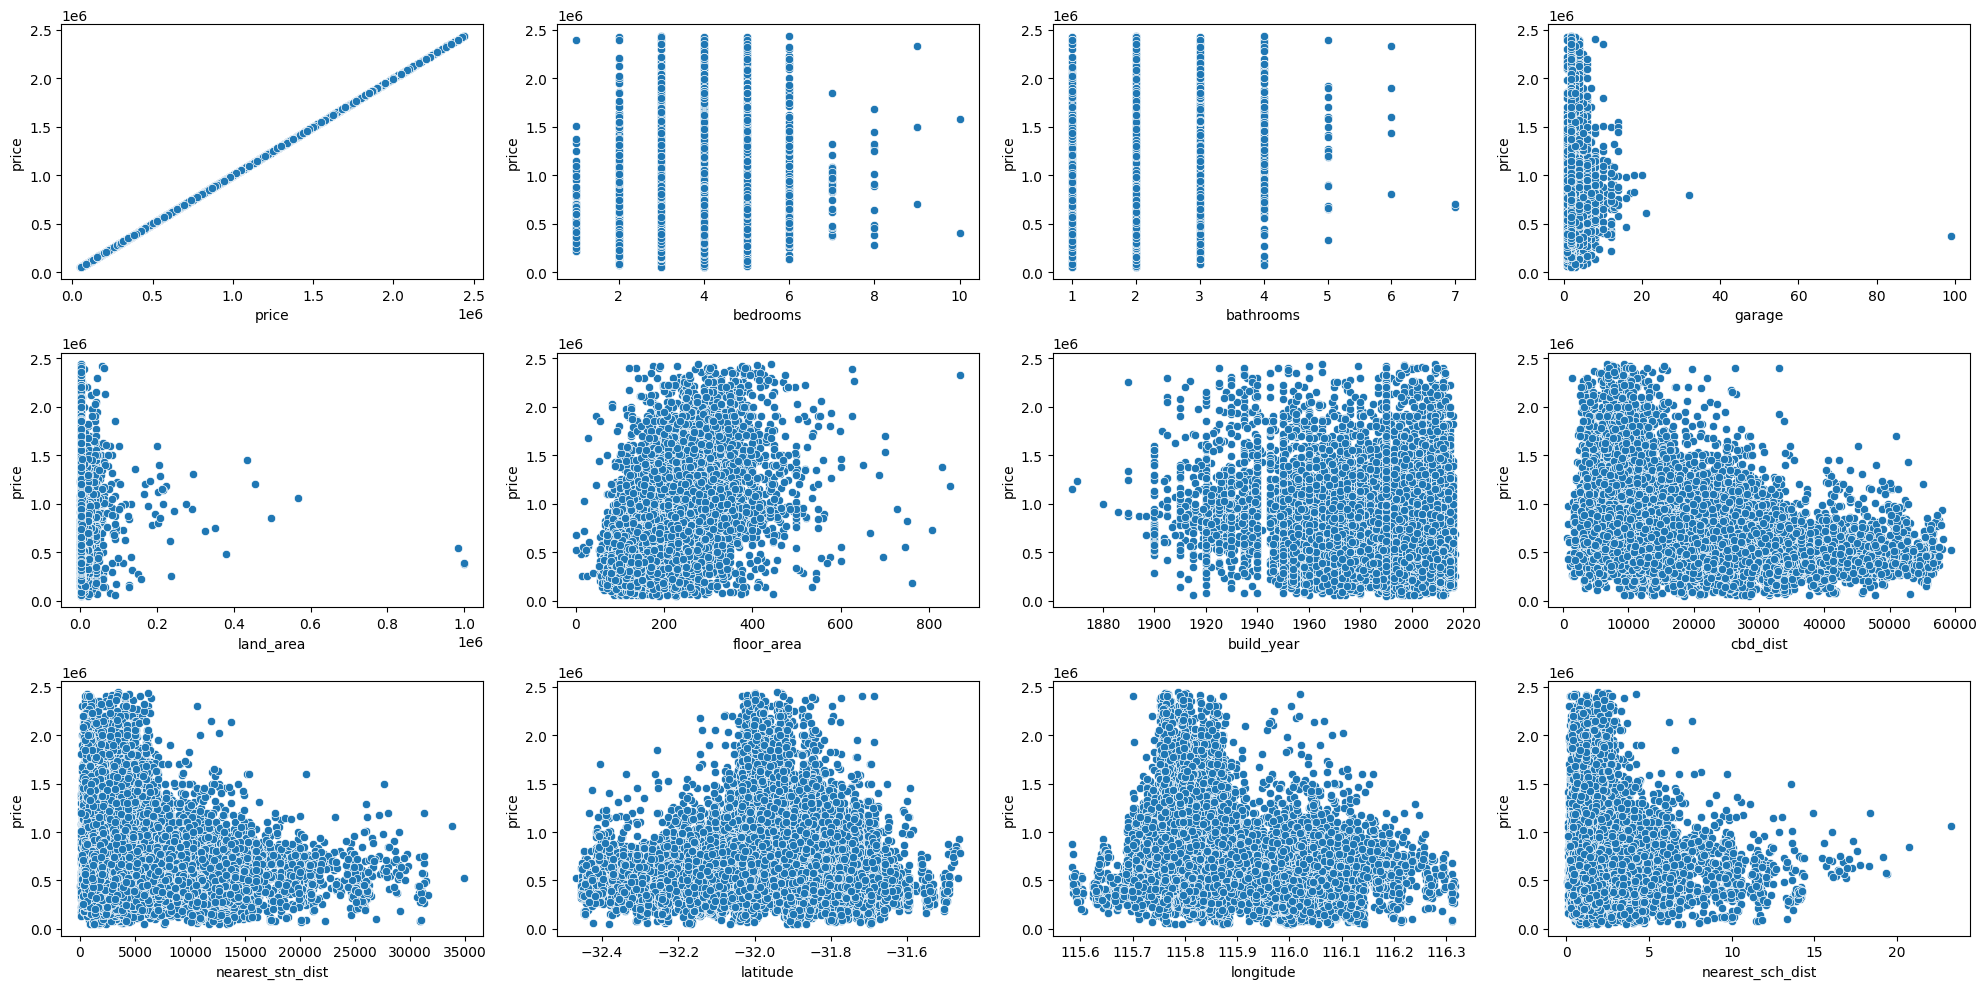

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(num_data.columns):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(data=num_data, x=col, y="price")
fig.tight_layout()
fig.show()

In [ ]:
outliers = num_data[
    (num_data["bathrooms"] > 10)
    | (num_data["garage"] > 15)
    | (num_data["land_area"] > 500000)
]

outliers

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,nearest_sch_dist
2122,800000,4,2,32.0,5136,238,2004.0,41300,17300,-32.307199,115.984813,4.219643
2684,375000,4,2,2.0,999999,175,2016.0,21400,11000,-31.789232,115.999298,1.427274
3575,385000,3,2,2.0,999999,140,2015.0,22400,11300,-31.789982,115.998233,1.302166
4188,980000,4,2,16.0,20400,302,2002.0,26800,8200,-32.188750,115.910540,6.626130
4261,1060000,4,2,2.2,566786,182,2000.0,45900,33800,-31.605167,116.120184,23.254372
8521,815000,3,2,17.0,9890,165,1996.0,25200,11600,-31.913106,116.121174,2.876641
9265,1000000,4,2,18.0,20025,212,2001.0,26500,8200,-32.186567,115.907092,6.230129
10512,765000,4,2,16.0,3446,253,2002.0,19700,10700,-31.802770,115.970980,1.658262
11529,615000,5,2,21.0,19370,171,1990.0,33500,18800,-31.859260,116.196480,2.765937
11919,1000000,4,2,20.0,10433,150,1985.0,15200,7800,-31.959860,116.019660,1.943808


In [ ]:
data = data.drop(index=outliers.index)
num_data = num_data.drop(index=outliers.index)

data = data.reset_index(drop=True)
num_data = num_data.reset_index(drop=True)

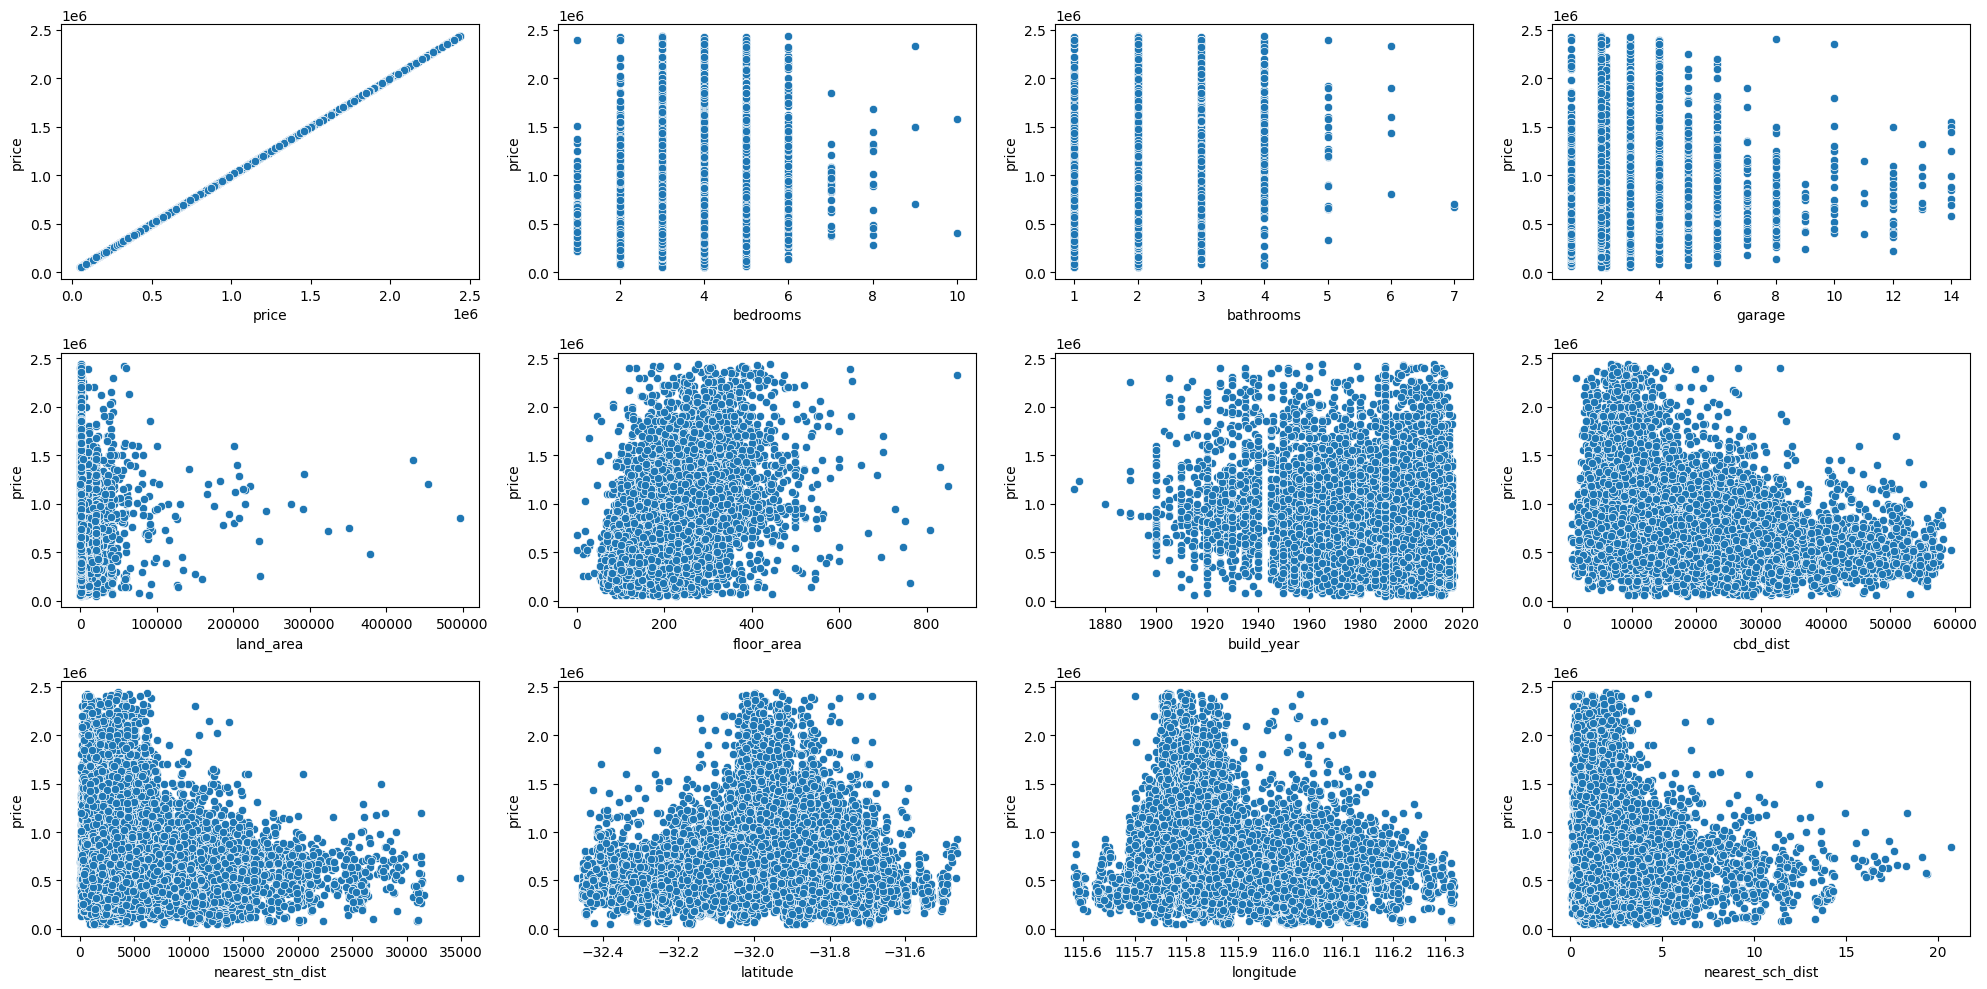

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(num_data.columns):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(data=num_data, x=col, y="price")
fig.tight_layout()
fig.show()

In [ ]:
data.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn,nearest_stn_dist,date_sold,latitude,longitude,nearest_sch,nearest_sch_dist
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,-32.193470,115.859554,ATWELL COLLEGE,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,-31.885790,115.947780,KIARA COLLEGE,1.514922


In [ ]:
categorical_cols = ["address", "suburb", "nearest_stn", "nearest_sch"]
for col in categorical_cols:
    print(f"{col}: {len(data[col].unique())} unique values")

address: 25009 unique values
suburb: 320 unique values
nearest_stn: 68 unique values
nearest_sch: 161 unique values


In [ ]:
data = data.drop(columns=categorical_cols)
data.head()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,date_sold,latitude,longitude,nearest_sch_dist
0,565000,4,2,2.0,600,160,2003.0,18300,1800,09-2018\r,-32.115900,115.842450,0.828339
1,365000,3,2,2.0,351,139,2013.0,26900,4900,02-2019\r,-32.193470,115.859554,5.524324
2,287000,3,1,1.0,719,86,1979.0,22600,1900,06-2015\r,-32.120578,115.993579,1.649178
3,255000,2,1,2.0,651,59,1953.0,17900,3600,07-2018\r,-31.900547,116.038009,1.571401
4,325000,4,1,2.0,466,131,1998.0,11200,2000,11-2016\r,-31.885790,115.947780,1.514922


In [ ]:
dates = data["date_sold"].str.replace("\r", "")
dates = pd.to_datetime(dates, format="%m-%Y")

# extract year and month sold
data["year_sold"] = dates.dt.year
data["month_sold"] = dates.dt.month

# drop old date column
data.drop(columns=["date_sold"], inplace=True)

data.head()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,nearest_sch_dist,year_sold,month_sold
0,565000,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,2018,9
1,365000,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,2019,2
2,287000,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,2015,6
3,255000,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,2018,7
4,325000,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,2016,11


In [ ]:
data["cbd_dist"] = data["cbd_dist"] / 1000
data["nearest_stn_dist"] = data["nearest_stn_dist"] / 1000

data.head()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,nearest_sch_dist,year_sold,month_sold
0,565000,4,2,2.0,600,160,2003.0,18.3,1.8,-32.115900,115.842450,0.828339,2018,9
1,365000,3,2,2.0,351,139,2013.0,26.9,4.9,-32.193470,115.859554,5.524324,2019,2
2,287000,3,1,1.0,719,86,1979.0,22.6,1.9,-32.120578,115.993579,1.649178,2015,6
3,255000,2,1,2.0,651,59,1953.0,17.9,3.6,-31.900547,116.038009,1.571401,2018,7
4,325000,4,1,2.0,466,131,1998.0,11.2,2.0,-31.885790,115.947780,1.514922,2016,11


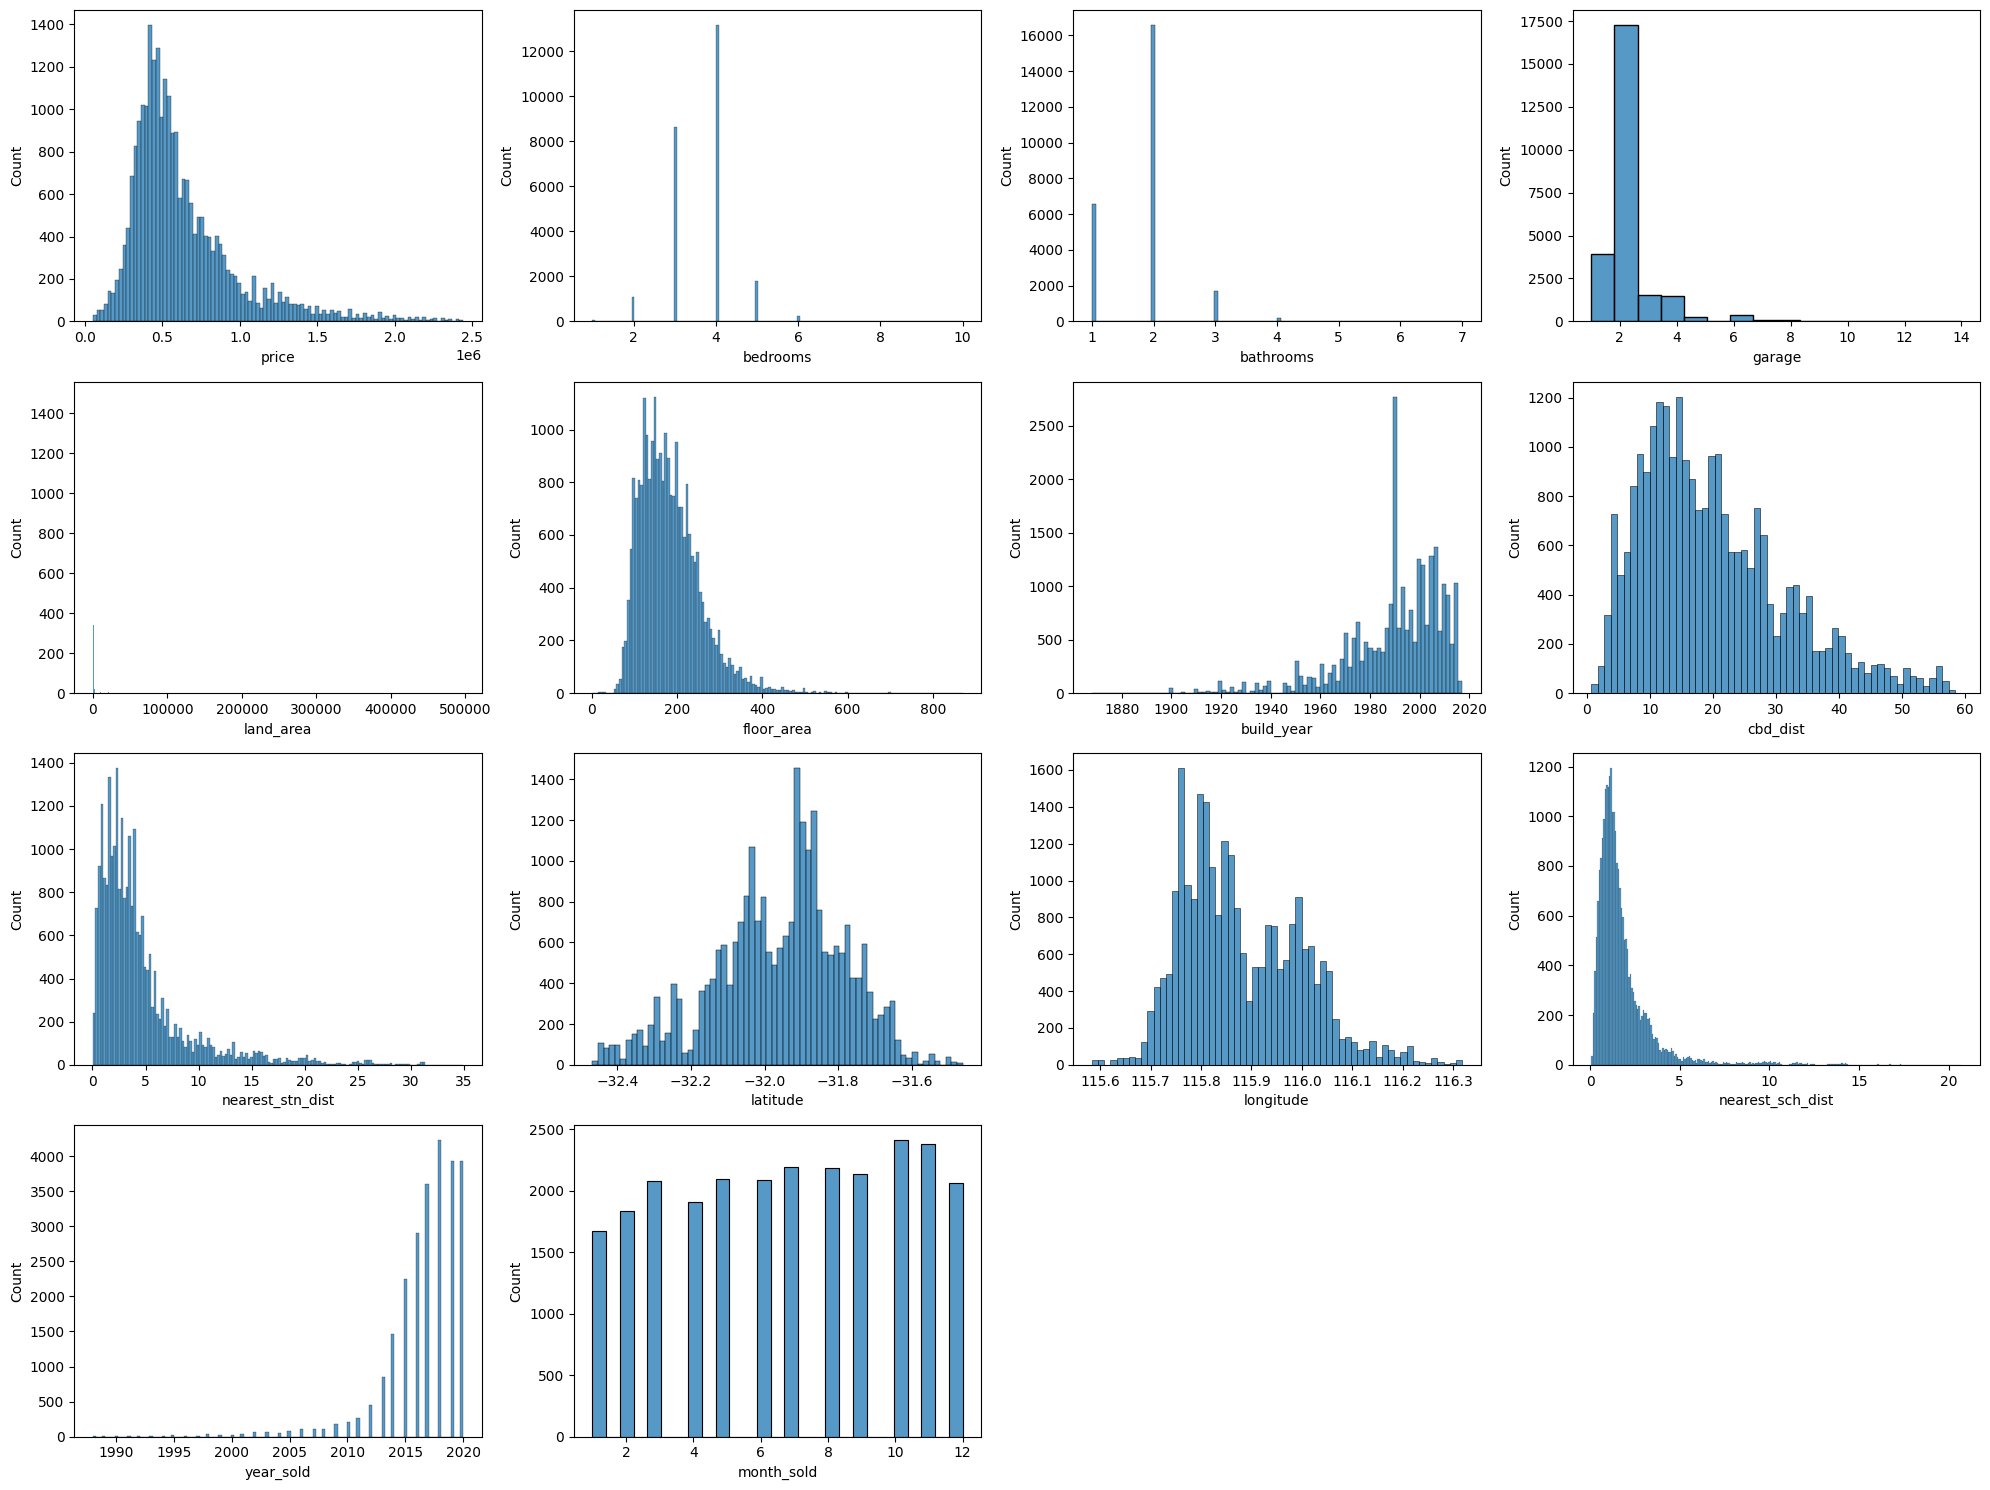

In [ ]:
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=data, x=col)
fig.tight_layout()
fig.show()

In [ ]:
# the number of bedrooms plus bathrooms
data["main_rooms"] = data["bedrooms"] + data["bathrooms"]

# floor area per bedroom
data["floor_area_per_bedroom"] = data["floor_area"] / data["bedrooms"]

# floor area per bathroom
data["floor_area_per_bathroom"] = data["floor_area"] / data["bathrooms"]

# floor area per main room
data["floor_area_per_room"] = data["floor_area"] / data["main_rooms"]

# the percentage of the land area which is occupied by the residence
data["floor_area_per_land_area"] = data["floor_area"] / data["land_area"] * 100

# the time it took the sell the residence
data["time_to_sell"] = np.abs(data["year_sold"] - data["build_year"])

# the product of the distances to the cbd, nearest station and nearest school
data["facility_dist"] = data["cbd_dist"] * data["nearest_stn_dist"] * data["nearest_sch_dist"]

In [ ]:
data.head()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,nearest_sch_dist,year_sold,month_sold,main_rooms,floor_area_per_bedroom,floor_area_per_bathroom,floor_area_per_room,floor_area_per_land_area,time_to_sell,facility_dist
0,565000,4,2,2.0,600,160,2003.0,18.3,1.8,-32.115900,115.842450,0.828339,2018,9,6,40.000000,80.0,26.666667,26.666667,15.0,27.285472
1,365000,3,2,2.0,351,139,2013.0,26.9,4.9,-32.193470,115.859554,5.524324,2019,2,5,46.333333,69.5,27.800000,39.601140,6.0,728.161193
2,287000,3,1,1.0,719,86,1979.0,22.6,1.9,-32.120578,115.993579,1.649178,2015,6,4,28.666667,86.0,21.500000,11.961057,36.0,70.815711
3,255000,2,1,2.0,651,59,1953.0,17.9,3.6,-31.900547,116.038009,1.571401,2018,7,3,29.500000,59.0,19.666667,9.062980,65.0,101.261076
4,325000,4,1,2.0,466,131,1998.0,11.2,2.0,-31.885790,115.947780,1.514922,2016,11,5,32.750000,131.0,26.200000,28.111588,18.0,33.934244


In [ ]:
data.shape

(25075, 21)

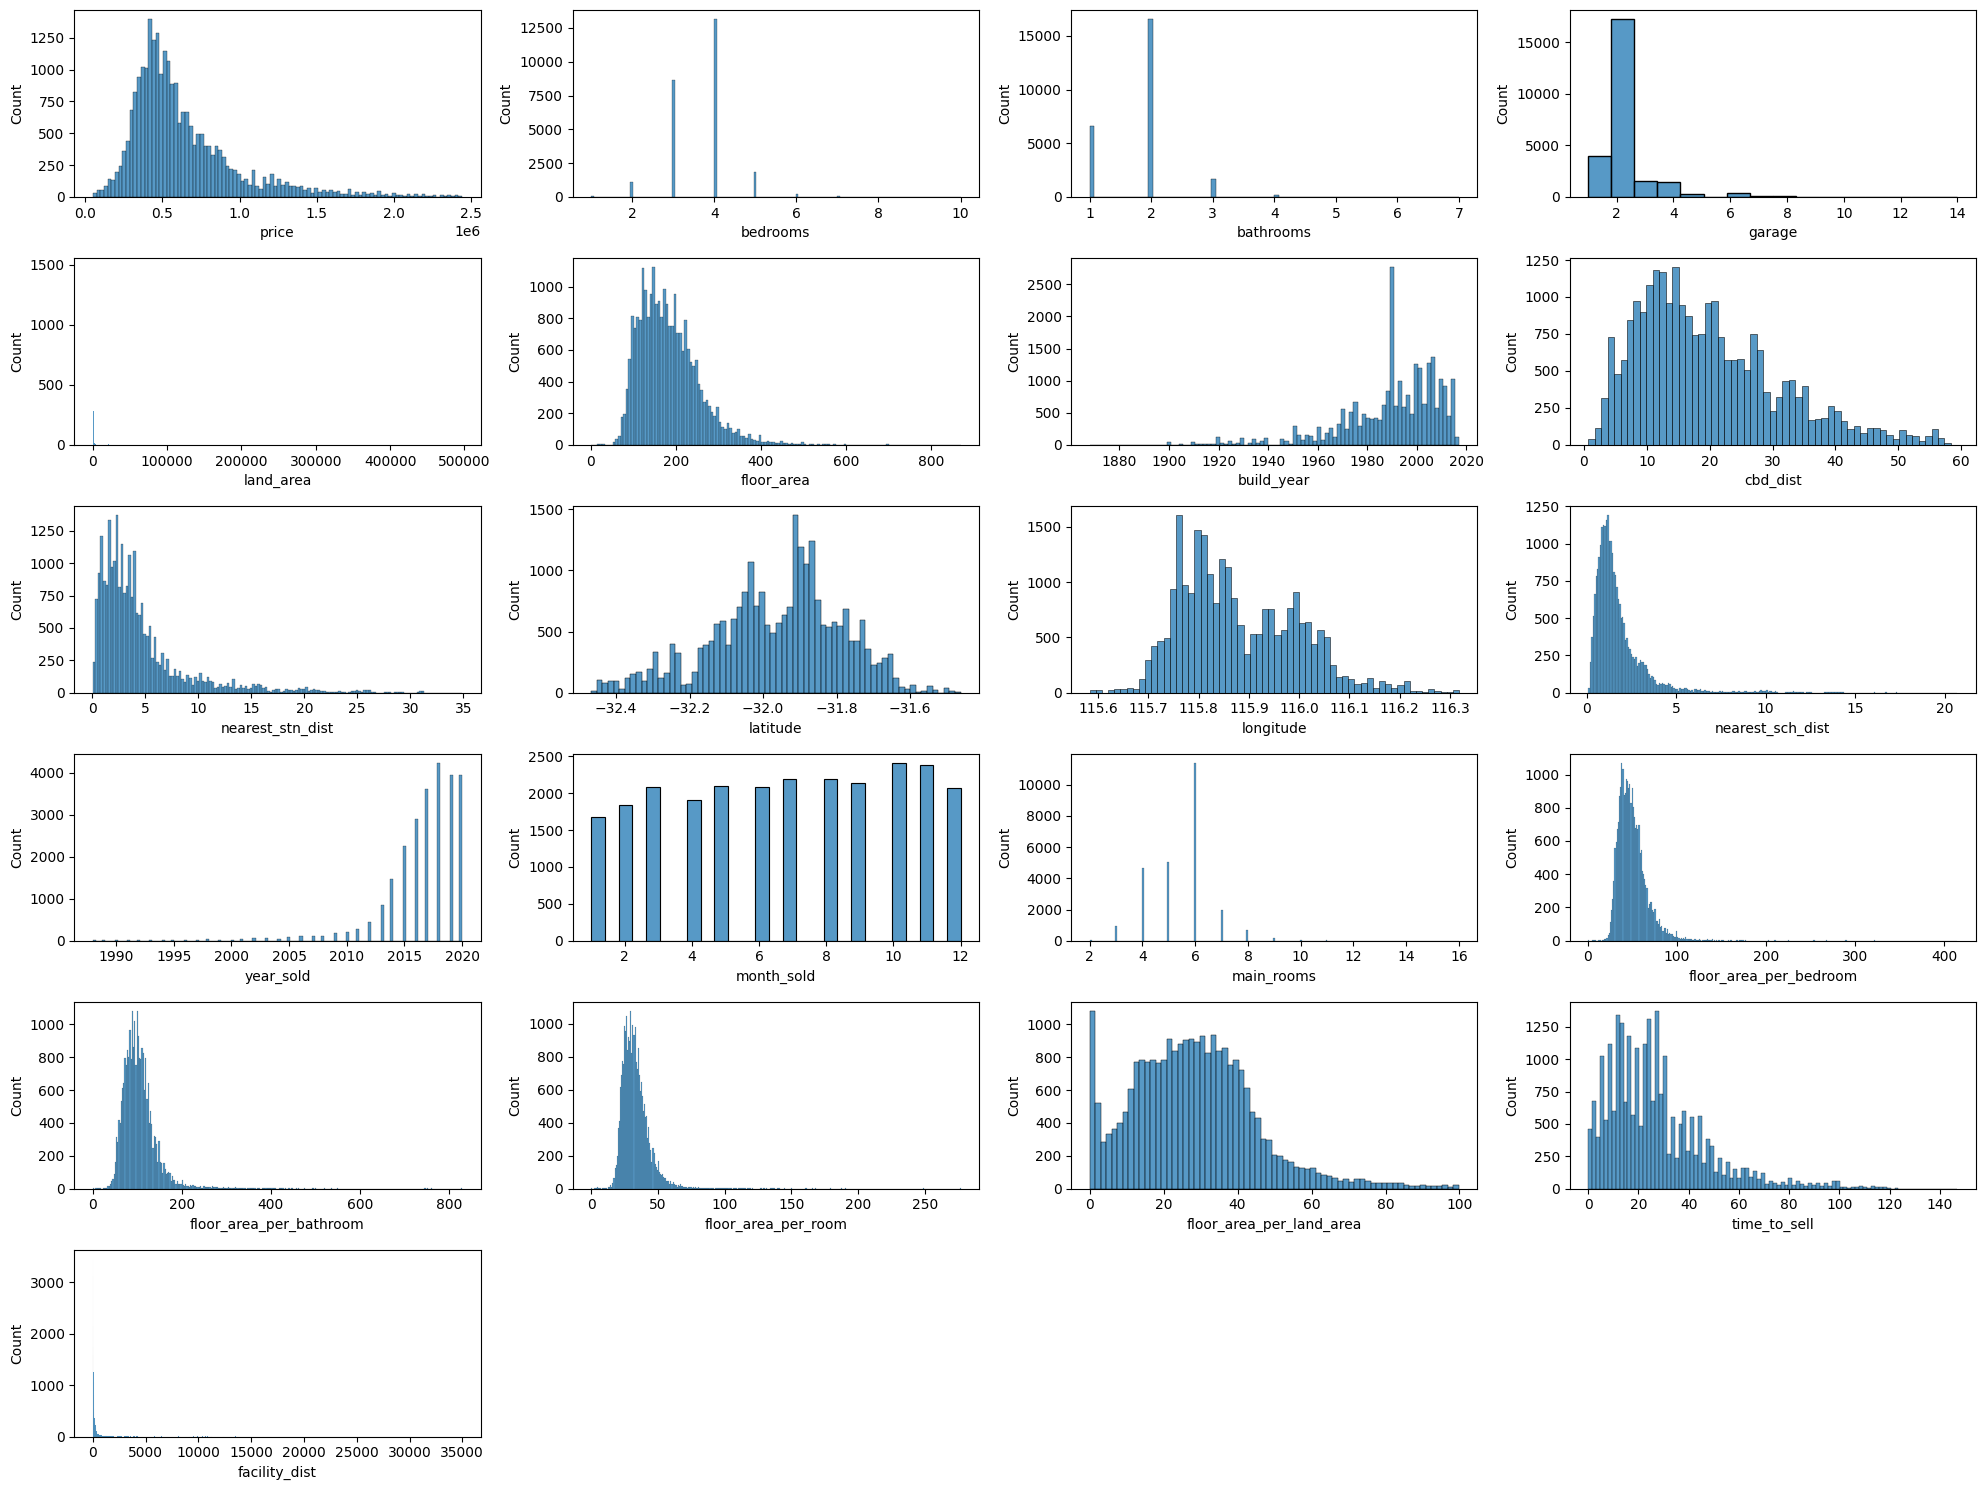

In [ ]:
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.histplot(data=data, x=col)
fig.tight_layout()
fig.show()

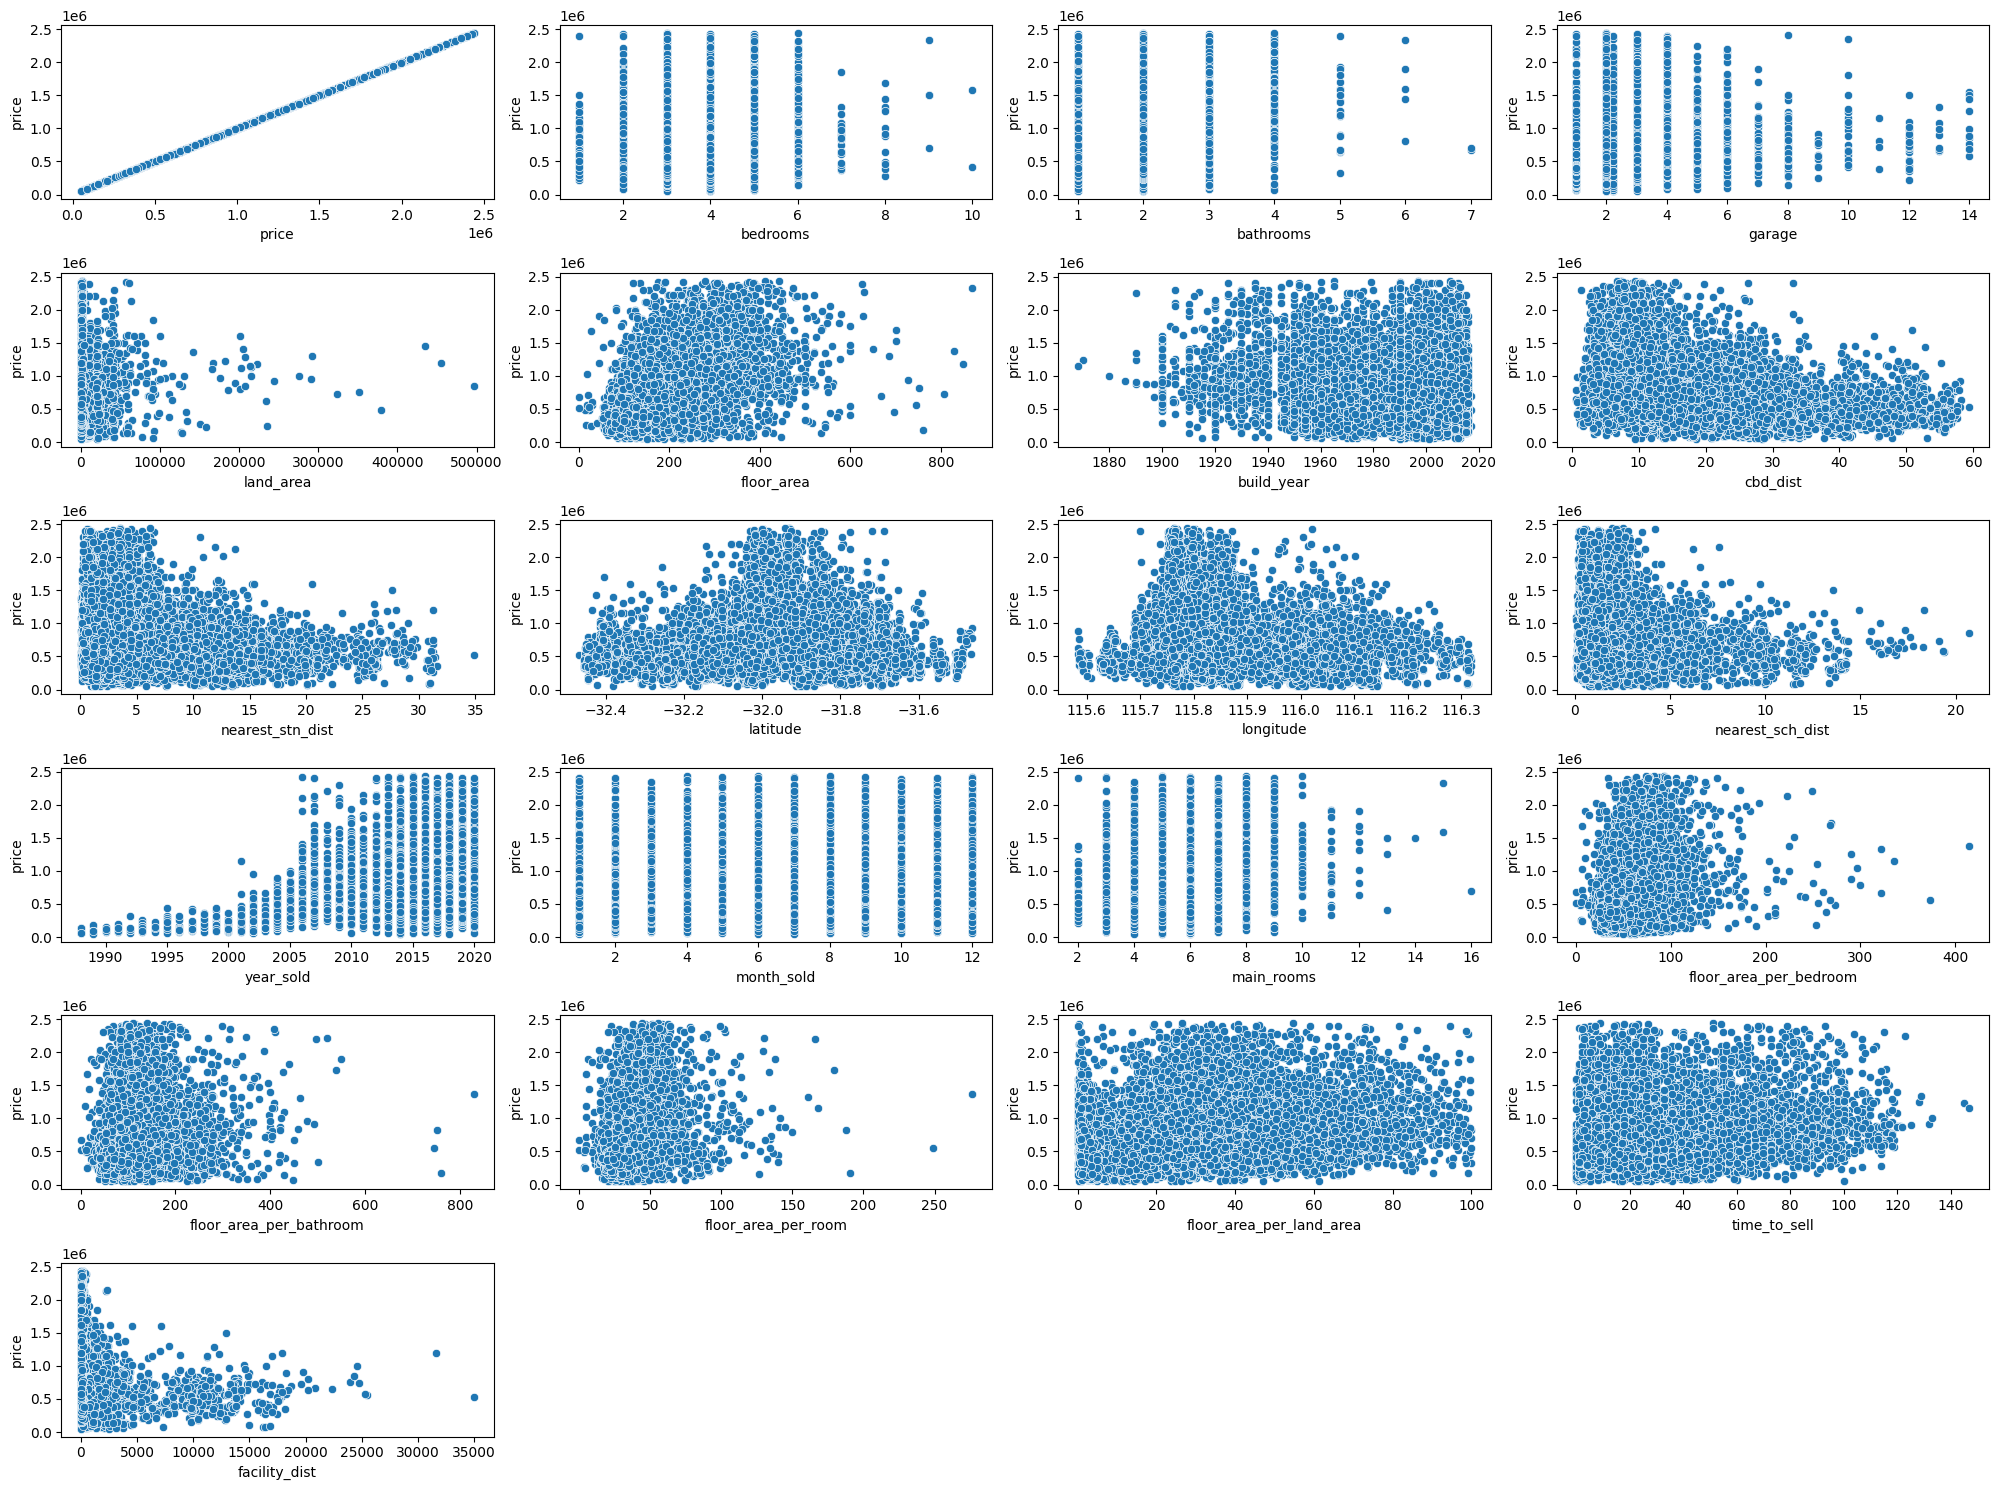

In [ ]:
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.scatterplot(data=data, x=col, y="price")
fig.tight_layout()
fig.show()

In [ ]:
price_corr = data.corr()["price"].sort_values(ascending=False)
price_corr

price                       1.000000
floor_area                  0.550378
floor_area_per_bedroom      0.449648
floor_area_per_room         0.422845
bathrooms                   0.377708
main_rooms                  0.344623
bedrooms                    0.248689
floor_area_per_bathroom     0.239935
floor_area_per_land_area    0.235006
time_to_sell                0.154470
garage                      0.149911
land_area                   0.078581
year_sold                   0.070602
latitude                    0.058271
month_sold                  0.006006
nearest_sch_dist           -0.028380
facility_dist              -0.045743
nearest_stn_dist           -0.097157
build_year                 -0.144811
longitude                  -0.187567
cbd_dist                   -0.351952
Name: price, dtype: float64

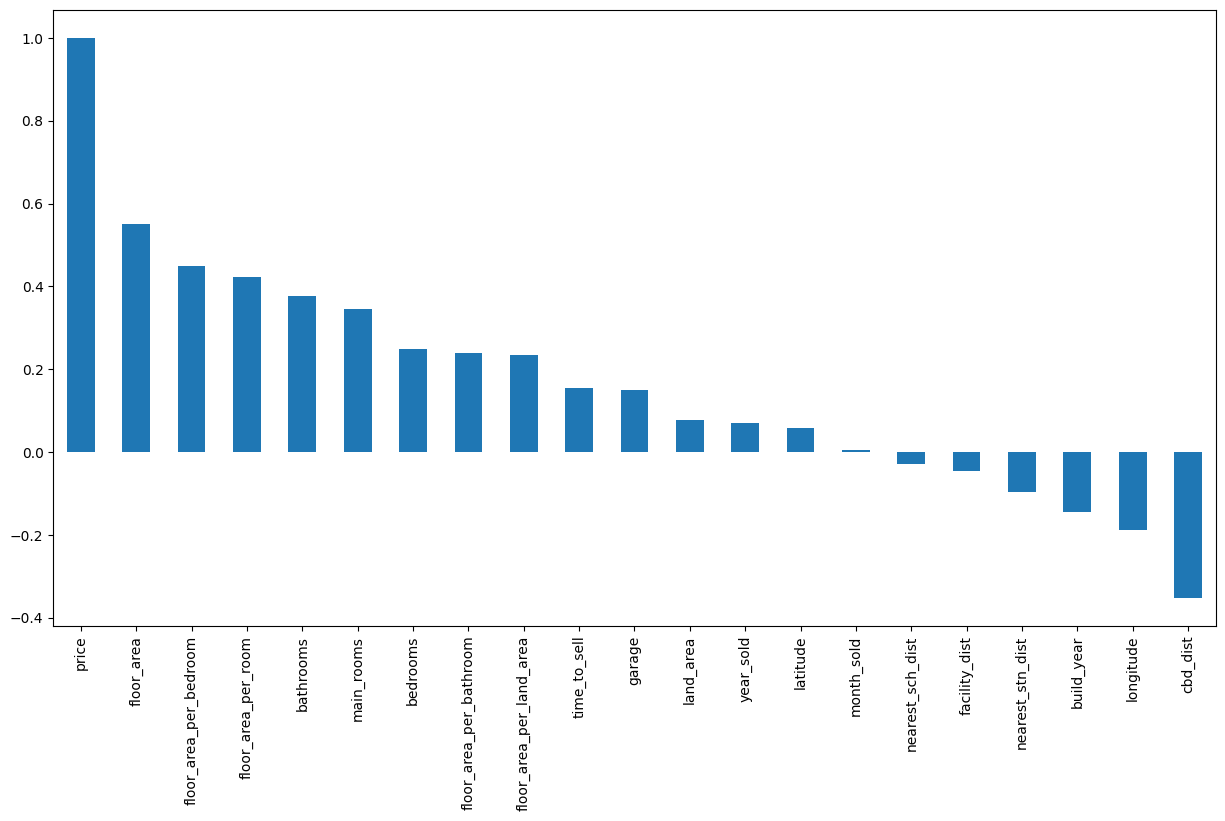

In [ ]:
price_corr.plot(kind='bar', figsize=(15, 8))
plt.show()

In [ ]:
data.dropna()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,latitude,longitude,year_sold,month_sold,main_rooms,floor_area_per_bedroom,floor_area_per_bathroom,floor_area_per_room,floor_area_per_land_area,time_to_sell
0,565000,4,2,2.0,600,160,2003.0,18.3,1.800,-32.115900,115.842450,2018,9,6,40.000000,80.0,26.666667,26.666667,15.0
1,365000,3,2,2.0,351,139,2013.0,26.9,4.900,-32.193470,115.859554,2019,2,5,46.333333,69.5,27.800000,39.601140,6.0
2,287000,3,1,1.0,719,86,1979.0,22.6,1.900,-32.120578,115.993579,2015,6,4,28.666667,86.0,21.500000,11.961057,36.0
3,255000,2,1,2.0,651,59,1953.0,17.9,3.600,-31.900547,116.038009,2018,7,3,29.500000,59.0,19.666667,9.062980,65.0
4,325000,4,1,2.0,466,131,1998.0,11.2,2.000,-31.885790,115.947780,2016,11,5,32.750000,131.0,26.200000,28.111588,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25070,350000,3,2,2.0,360,171,2011.0,29.2,5.800,-31.694920,115.797187,2020,10,5,57.000000,85.5,34.200000,47.500000,9.0
25071,400000,3,1,1.0,692,126,1976.0,11.8,6.900,-31.846130,115.868900,2015,8,4,42.000000,126.0,31.500000,18.208092,39.0
25072,386000,4,2,2.0,722,142,1985.0,14.0,7.500,-31.826870,115.873090,2017,5,6,35.500000,71.0,23.666667,19.667590,32.0
25073,570000,3,1,2.0,268,100,1920.0,4.9,0.432,-31.975310,115.903260,2017,9,4,33.333333,100.0,25.000000,37.313433,97.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
Y = data['price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
data.isnull().sum()

price                       0
bedrooms                    0
bathrooms                   0
garage                      0
land_area                   0
floor_area                  0
build_year                  0
cbd_dist                    0
nearest_stn_dist            0
latitude                    0
longitude                   0
year_sold                   0
month_sold                  0
main_rooms                  0
floor_area_per_bedroom      0
floor_area_per_bathroom     0
floor_area_per_room         0
floor_area_per_land_area    0
time_to_sell                0
dtype: int64

In [ ]:
X_valid.isnull().sum()

bedrooms                    0
bathrooms                   0
garage                      0
land_area                   0
floor_area                  0
build_year                  0
cbd_dist                    0
nearest_stn_dist            0
latitude                    0
longitude                   0
year_sold                   0
month_sold                  0
main_rooms                  0
floor_area_per_bedroom      0
floor_area_per_bathroom     0
floor_area_per_room         0
floor_area_per_land_area    0
time_to_sell                0
dtype: int64

bedrooms                    0
bathrooms                   0
garage                      0
land_area                   0
floor_area                  0
build_year                  0
cbd_dist                    0
nearest_stn_dist            0
latitude                    0
longitude                   0
year_sold                   0
month_sold                  0
main_rooms                  0
floor_area_per_bedroom      0
floor_area_per_bathroom     0
floor_area_per_room         0
floor_area_per_land_area    0
time_to_sell                0
dtype: int64

In [ ]:
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.4031085478715559


In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred))
r2 = r2_score(Y_valid, Y_pred)
print("Accuracy:", r2)

0.16821833631608732
Accuracy: 0.8198090369364625


In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
r2 = r2_score(Y_valid, Y_pred)
print("Accuracy:", r2)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

Accuracy: 0.5995727837153368
0.29235649339337644


In [ ]:
import sklearn.metrics as metrics


In [ ]:
!pip install catboost

from catboost import CatBoostRegressor

In [ ]:

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

In [ ]:
preds = cb_model.predict(X_valid)
cb_r2_score = metrics.r2_score(Y_valid, preds)
cb_r2_score

0.856117053905464